In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [30]:
DF = pd.read_csv('DF')
DF_SDG = pd.read_csv('DF_SDG_Lee')
DF_ML = pd.read_csv('DF_MachineLearning_Lee')
DF_SDG_ML = pd.concat([DF_SDG, DF_ML], ignore_index=True)

In [113]:
unique_types_DF = DF['type'].unique()
unique_types_DF_SDG = DF_SDG['type'].unique()
print(unique_types_DF)
print(unique_types_DF_SDG)

['article' 'review' 'book-chapter' 'book' 'preprint' 'dissertation'
 'paratext' 'other' 'report' 'editorial']
['article' 'review' 'book-chapter' 'book' 'preprint' 'report']


**In line with the work of Lee and al(2015), we will apply a log transformation to the number of authors due to the fact that the Novelty (Commonness_Score) has been log transformed. We will also create a vector representing this log_num_authors squared to study a polynamial relation ship  (U reversed) between the Novelty and num_authors. Moreover, since we're going to compare the citation metric to the commonness metric. We'll log-transform the citation variable, as was done in the Commonness metric building.**

In [34]:
#Number of authors
DF['log_num_authors'] = np.log(DF['num_authors'] + 1)
DF['log_num_authors_squared'] = DF['log_num_authors']**2

DF_SDG['log_num_authors_SDG'] = np.log(DF_SDG['num_authors'] + 1)
DF_SDG['log_num_authors_squared_SDG'] = DF_SDG['log_num_authors_SDG']**2

#Metric of citation
DF['log_num_citations'] = np.log(DF['num_citations'] + 1)
DF_SDG['log_num_citations_SDG'] = np.log(DF_SDG['num_citations'] + 1)

**Descriptive statistics:**

In [114]:
DF.describe()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations,predicted,predicted_DF_nov,predicted_DF_cit,predicted_SDG_nov,predicted_SDG_cit
count,2.527000e+03,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,5.110118e+07,2016.023744,611.91294,5.535417,-3.499209,0.563910,1.609754,3.006481,5.642044,5.642044,-3.499209,5.642044,-3.499209,5.642044
std,2.929209e+07,4.261660,1410.29717,8.163186,1.882766,0.495997,0.644467,2.552159,1.225520,0.205319,0.100799,0.205319,0.100799,0.205319
min,2.199100e+04,2007.000000,17.00000,0.000000,-12.340187,0.000000,0.000000,0.000000,2.890372,5.516949,-3.821180,5.516949,-3.821180,5.516949
25%,2.555286e+07,2013.000000,107.00000,2.000000,-4.488933,0.000000,1.098612,1.206949,4.682131,5.519575,-3.580784,5.519575,-3.580784,5.519575
50%,5.224592e+07,2017.000000,298.00000,4.000000,-3.227289,1.000000,1.609438,2.590290,5.700444,5.585999,-3.489109,5.585999,-3.489109,5.585999
75%,7.685187e+07,2019.000000,677.00000,6.000000,-2.227209,1.000000,1.945910,3.786566,6.519147,5.668193,-3.435696,5.668193,-3.435696,5.668193
max,9.991358e+07,2023.000000,29728.00000,100.000000,0.817186,1.000000,4.615121,21.299337,10.299878,7.402047,-3.208153,7.402047,-3.208153,7.402047


In [115]:
DF_SDG.describe()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG,predicted_SDG_nov,predicted_SDG_cit
count,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,5.223063e+07,2017.813065,195.777889,5.095477,-3.501014,0.578894,1.541251,2.764835,4.555043,-3.501014,4.555043
std,2.931863e+07,3.810822,969.983425,8.230576,1.718470,0.493985,0.624316,2.474693,0.900848,0.293023,0.139778
min,1.228150e+05,2007.000000,17.000000,0.000000,-10.925903,0.000000,0.000000,0.000000,2.890372,-4.664390,4.482949
25%,2.627586e+07,2017.000000,48.500000,2.000000,-4.324481,0.000000,1.098612,1.206949,3.901922,-3.708476,4.487313
50%,5.533194e+07,2019.000000,77.000000,3.000000,-3.209766,1.000000,1.386294,1.921812,4.356709,-3.524289,4.499893
75%,7.717824e+07,2020.000000,155.500000,5.000000,-2.291944,1.000000,1.791759,3.210402,5.053051,-3.311292,4.552017
max,9.980607e+07,2023.000000,23938.000000,100.000000,0.354995,1.000000,4.615121,21.299337,10.083264,-2.995141,5.831096


**Let's look at the correlations between our variables:**

In [35]:
DF.corr()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations
PMID,1.000000,0.004193,0.022022,-0.000328,-0.027966,0.014033,-0.015626,-0.004670,-0.026606
year,0.004193,1.000000,-0.237062,0.067355,0.038540,-0.001280,0.098606,0.082681,-0.483523
num_citations,0.022022,-0.237062,1.000000,0.081276,0.019398,-0.022876,0.054411,0.091630,0.570627
num_authors,-0.000328,0.067355,0.081276,1.000000,0.038328,0.032758,0.772121,0.912487,0.131175
Commonness_Score,-0.027966,0.038540,0.019398,0.038328,1.000000,-0.031218,0.052558,0.046871,0.084826
SDG_dummy,0.014033,-0.001280,-0.022876,0.032758,-0.031218,1.000000,0.068354,0.054622,-0.033938
log_num_authors,-0.015626,0.098606,0.054411,0.772121,0.052558,0.068354,1.000000,0.951496,0.143543
log_num_authors_squared,-0.004670,0.082681,0.091630,0.912487,0.046871,0.054622,0.951496,1.000000,0.163161
log_num_citations,-0.026606,-0.483523,0.570627,0.131175,0.084826,-0.033938,0.143543,0.163161,1.000000


        ->Week correlation between Commonness and log_num_authors, Commonness and log_num_authors_squared 

In [36]:
DF_SDG.corr()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG
PMID,1.000000,0.033982,0.002696,-0.018126,0.024223,0.046525,-0.033221,-0.023308,-0.058472
year,0.033982,1.000000,-0.212376,0.057663,-0.052501,-0.006587,0.103993,0.087966,-0.543695
num_citations,0.002696,-0.212376,1.000000,-0.000872,0.049038,-0.019967,-0.058117,-0.017874,0.456896
num_authors,-0.018126,0.057663,-0.000872,1.000000,0.074139,0.049737,0.757696,0.903469,0.136116
Commonness_Score,0.024223,-0.052501,0.049038,0.074139,1.000000,0.004095,0.154601,0.125754,0.241212
SDG_dummy,0.046525,-0.006587,-0.019967,0.049737,0.004095,1.000000,0.017414,0.029167,-0.016950
log_num_authors_SDG,-0.033221,0.103993,-0.058117,0.757696,0.154601,0.017414,1.000000,0.953551,0.130996
log_num_authors_squared_SDG,-0.023308,0.087966,-0.017874,0.903469,0.125754,0.029167,0.953551,1.000000,0.149962
log_num_citations_SDG,-0.058472,-0.543695,0.456896,0.136116,0.241212,-0.016950,0.130996,0.149962,1.000000


        ->Correlation is more important between Commonness and log_num_authors, Commonness and log_num_authors_squared in the SDG table and closer to Lee and al(2015)'s results!

        NB: The correlation found by the latter was closer to 20%.

**Let's take a look at the distribution of Commonness_Score and num_citations and their evolution over time:**

Distribution:

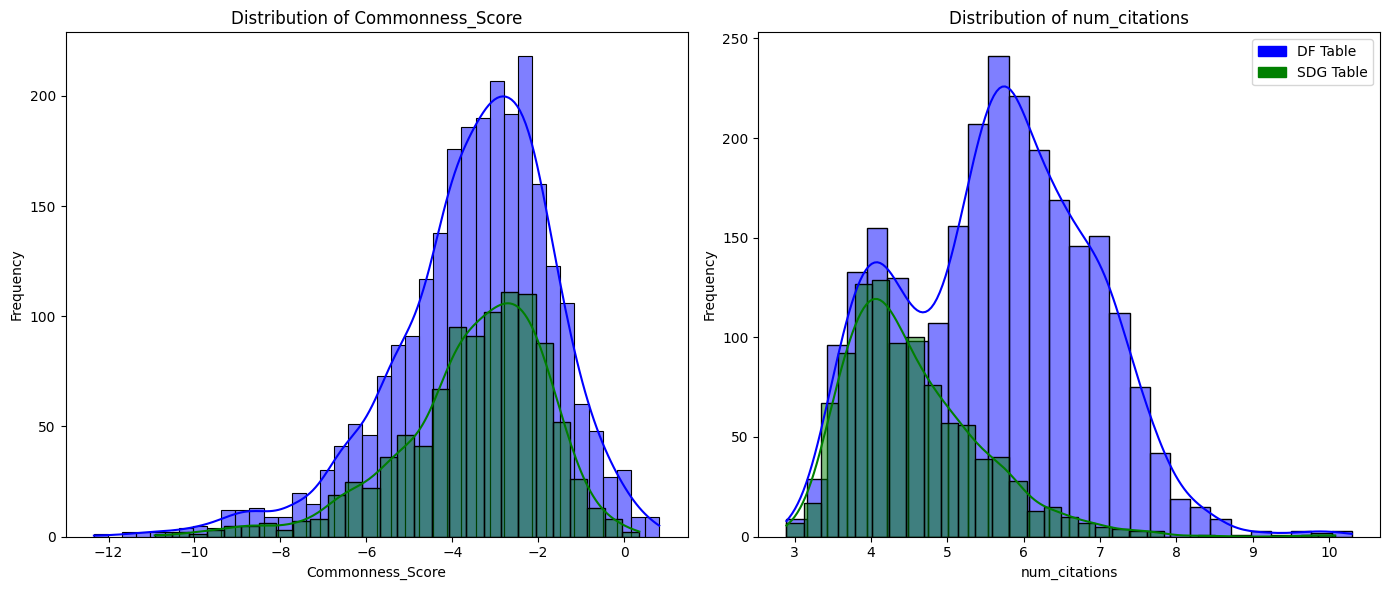

In [101]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(DF['Commonness_Score'], kde=True, color='blue')
sns.histplot(DF_SDG['Commonness_Score'], kde=True, color='green')
plt.xlabel('Commonness_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Commonness_Score')

plt.subplot(1, 2, 2)
sns.histplot(DF['log_num_citations'], kde=True, color='blue')
sns.histplot(DF_SDG['log_num_citations_SDG'], kde=True, color='green')
plt.xlabel('num_citations')
plt.ylabel('Frequency')
plt.title('Distribution of num_citations')

blue_patch = mpatches.Patch(color='blue', label='DF Table')
green_patch = mpatches.Patch(color='green', label='SDG Table')

plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.tight_layout()
plt.show()

Evolution over time (annuel mean):

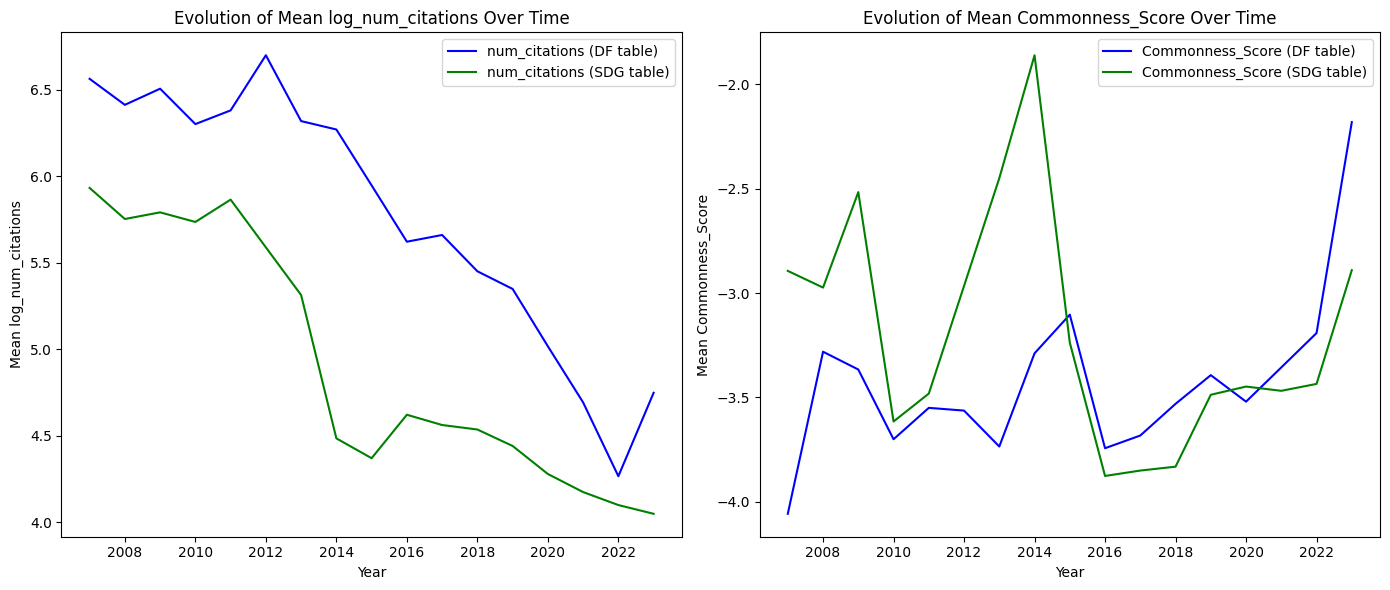

In [106]:
# Calcul des moyennes annuelles
mean_citations_per_year_DF = DF.groupby('year')['log_num_citations'].mean().reset_index()
mean_citations_per_year_SDG = DF_SDG.groupby('year')['log_num_citations_SDG'].mean().reset_index()
mean_commonness_score_per_year_DF = DF.groupby('year')['Commonness_Score'].mean().reset_index()
mean_commonness_score_per_year_SDG = DF_SDG.groupby('year')['Commonness_Score'].mean().reset_index()

# Création de la figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(14, 6))

# Premier graphique : Evolution du nombre moyen de citations pour DF et DF_SDG
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='log_num_citations', data=mean_citations_per_year_DF, color='blue', label='num_citations (DF table)')
sns.lineplot(x='year', y='log_num_citations_SDG', data=mean_citations_per_year_SDG, color='green', label='num_citations (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean log_num_citations')
plt.title('Evolution of Mean log_num_citations Over Time')
plt.legend()

# Deuxième graphique : Evolution du score moyen de Commonness pour DF et DF_SDG
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='Commonness_Score', data=mean_commonness_score_per_year_DF, color='blue', label='Commonness_Score (DF table)')
sns.lineplot(x='year', y='Commonness_Score', data=mean_commonness_score_per_year_SDG, color='green', label='Commonness_Score (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean Commonness_Score')
plt.title('Evolution of Mean Commonness_Score Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
Y_DF_nov = DF['Commonness_Score']
Y_DF_cit = DF['log_num_citations']
X_DF = DF[['log_num_authors','log_num_authors_squared']]
X_DF = sm.add_constant(X_DF)

Y_SDG_nov = DF_SDG['Commonness_Score']
Y_SDG_cit = DF_SDG['log_num_citations_SDG']
X_SDG = DF_SDG[['log_num_authors_SDG','log_num_authors_squared_SDG']]
X_SDG = sm.add_constant(X_SDG)

In [93]:
model_DF_nov = sm.OLS(Y_DF_nov, X_DF).fit(cov_type='HC3')
DF['predicted_DF_nov'] = model_DF_nov.predict(X_DF)

model_DF_cit = sm.OLS(Y_DF_cit, X_DF).fit(cov_type='HC3')
DF['predicted_DF_cit'] = model_DF_cit.predict(X_DF)

model_SDG_nov = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_nov'] = model_SDG_nov.predict(X_SDG)

model_SDG_cit = sm.OLS(Y_SDG, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_cit'] = model_SDG_cit.predict(X_SDG)

In [94]:
model_DF_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Commonness_Score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.953
Date:                Sat, 25 May 2024   Prob (F-statistic):             0.0524
Time:                        17:26:52   Log-Likelihood:                -5180.5
No. Observations:                2527   AIC:                         1.037e+04
Df Residuals:                    2524   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8212      0.228    -16.745      0.000      -4.268      -3.374
log_num_authors             0.2457      0.228      1.079      0.280      -0.200       0.692
log_num_authors_squared    -0.0245      0.053     -0.463      0.643      -0.128       0.079
==============================================================================
Omnibus:                      302.158   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.638
Skew:                          -0.845   Prob(JB):                    2.33e-103
Kurtosis:                       4.279   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Not significant results in this table containing papers from several queries (for 2,527 obs.)

In [95]:
model_DF_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_num_citations   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.72
Date:                Sat, 25 May 2024   Prob (F-statistic):           4.63e-13
Time:                        17:26:56   Log-Likelihood:                -4063.1
No. Observations:                2527   AIC:                             8132.
Df Residuals:                    2524   BIC:                             8150.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.6151      0.144     38.950      0.000       5.333       5.898
log_num_authors            -0.2351      0.152     -1.545      0.122      -0.533       0.063
log_num_authors_squared     0.1348      0.038      3.539      0.000       0.060       0.210
==============================================================================
Omnibus:                       23.809   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.884
Skew:                           0.079   Prob(JB):                     0.000216
Kurtosis:                       2.632   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [96]:
model_SDG_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Commonness_Score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.45
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.21e-05
Time:                        17:26:59   Log-Likelihood:                -1935.4
No. Observations:                 995   AIC:                             3877.
Df Residuals:                     992   BIC:                             3891.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.6644      0.311    -14.996      0.000      -5.274      -4.055
log_num_authors_SDG             1.0523      0.308      3.421      0.001       0.449       1.655
log_num_authors_squared_SDG    -0.1658      0.068     -2.434      0.015      -0.299      -0.032
==============================================================================
Omnibus:                      137.598   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.752
Skew:                          -0.937   Prob(JB):                     6.33e-47
Kurtosis:                       4.272   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Significant results in this table containing papers from SDG query (for 995 obs.)

In [97]:
model_SDG_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_num_citations_SDG   R-squared:                       0.024
Model:                               OLS   Adj. R-squared:                  0.022
Method:                    Least Squares   F-statistic:                     11.84
Date:                   Sat, 25 May 2024   Prob (F-statistic):           8.30e-06
Time:                           17:27:05   Log-Likelihood:                -1295.3
No. Observations:                    995   AIC:                             2597.
Df Residuals:                        992   BIC:                             2611.
Df Model:                              2                                         
Covariance Type:                     HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.5713      0.201     22.691      0.000       4.176       4.966
log_num_authors_SDG            -0.1908      0.209     -0.913      0.361      -0.601       0.219
log_num_authors_squared_SDG     0.1005      0.049      2.046      0.041       0.004       0.197
==============================================================================
Omnibus:                      255.862   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.730
Skew:                           1.303   Prob(JB):                    1.26e-154
Kurtosis:                       6.210   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

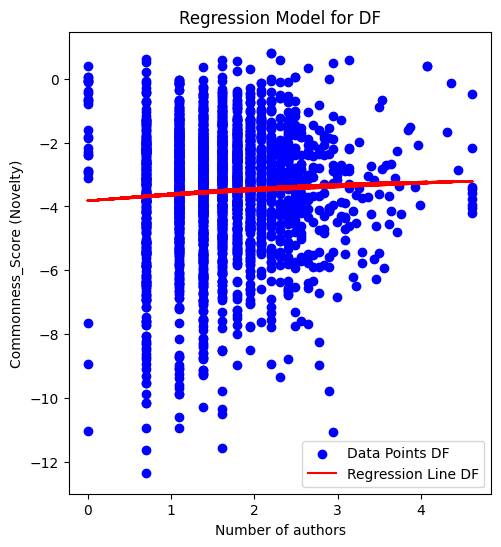

In [60]:
#DF_nov
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(DF['log_num_authors'], DF['Commonness_Score'], color='blue', label='Data Points DF')
plt.plot(DF['log_num_authors'], DF['predicted_DF_nov'], color='red', label='Regression Line DF')
plt.xlabel('Number of authors')
plt.ylabel('Commonness_Score (Novelty)')
plt.title('Regression Model for DF')
plt.legend()

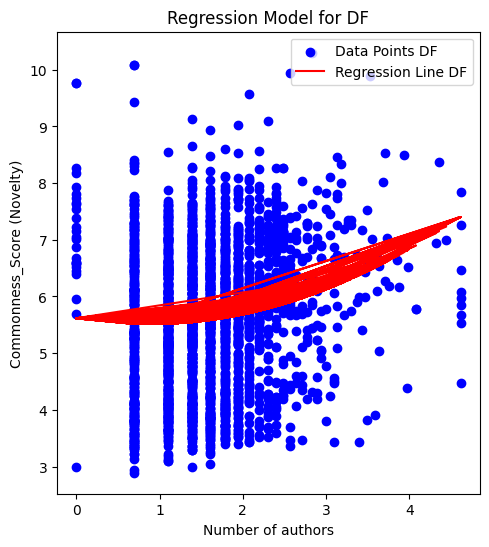

In [63]:
#DF_cit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(DF['log_num_authors'], DF['log_num_citations'], color='blue', label='Data Points DF')
plt.plot(DF['log_num_authors'], DF['predicted_DF_cit'], color='red', label='Regression Line DF')
plt.xlabel('Number of authors')
plt.ylabel('Commonness_Score (Novelty)')
plt.title('Regression Model for DF')
plt.legend()

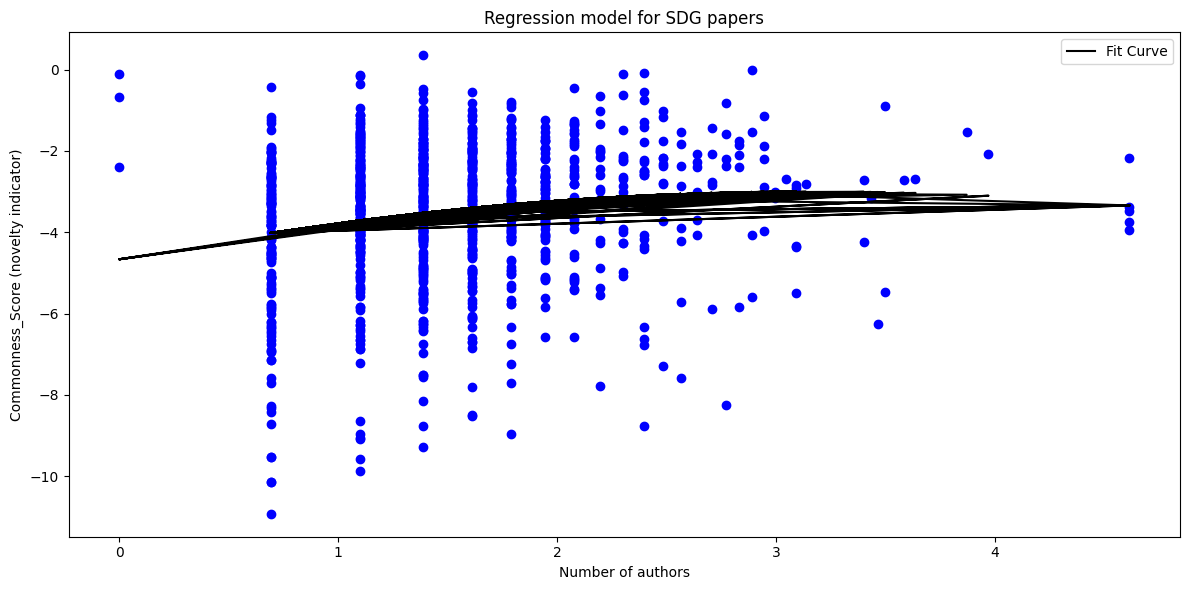

In [98]:
#SDG_nov
plt.figure(figsize=(12, 6))

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Commonness_Score'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='black', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Commonness_Score (novelty indicator)')
plt.title('Regression model for SDG papers')
plt.legend()

plt.tight_layout()
plt.show()

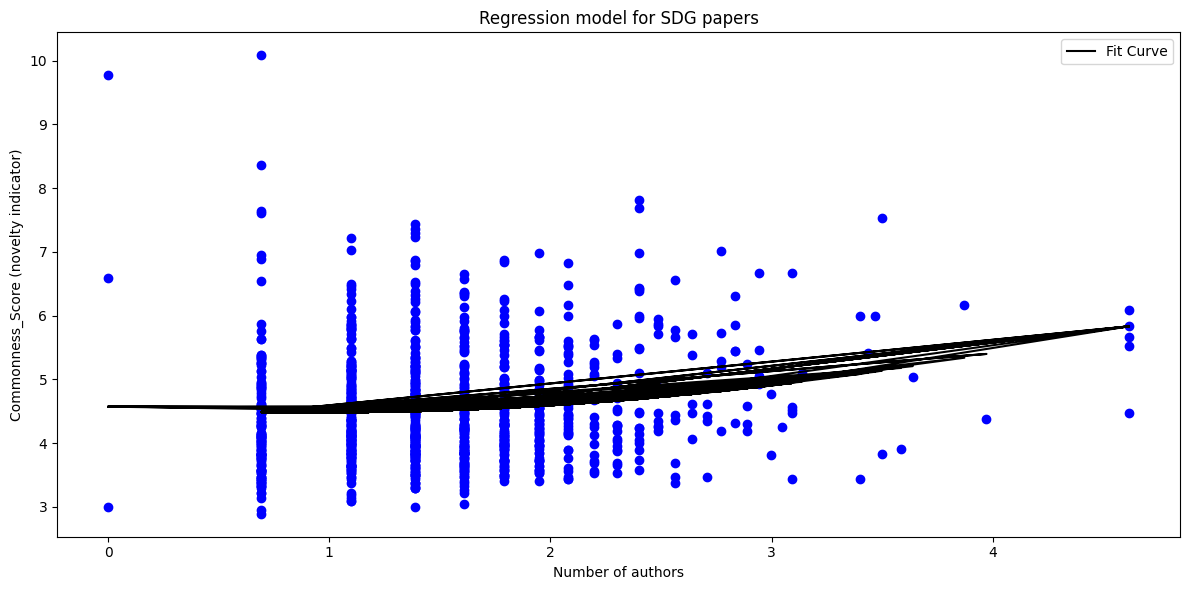

In [99]:
#SDG_cit
plt.figure(figsize=(12, 6))

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['log_num_citations_SDG'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_cit'], color='black', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Commonness_Score (novelty indicator)')
plt.title('Regression model for SDG papers')
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
#Calculate the pairing that maximizes the commonness_score function, number of authors
b0 = model_SDG_nov.params['const']
b1 = model_SDG_nov.params['log_num_authors_SDG']
b2 = model_SDG_nov.params['log_num_authors_squared_SDG']

log_num_authors_SDG_max = b1 / (-2 * b2)

commonness_score_max = b0 + b1 * log_num_authors_SDG_max + b2 * log_num_authors_SDG_max**2

print(f'The corresponding maximum torque is ({log_num_authors_SDG_max:.4f}, {commonness_score_max:.4f})')


The corresponding maximum torque is (3.1731, -2.9949)


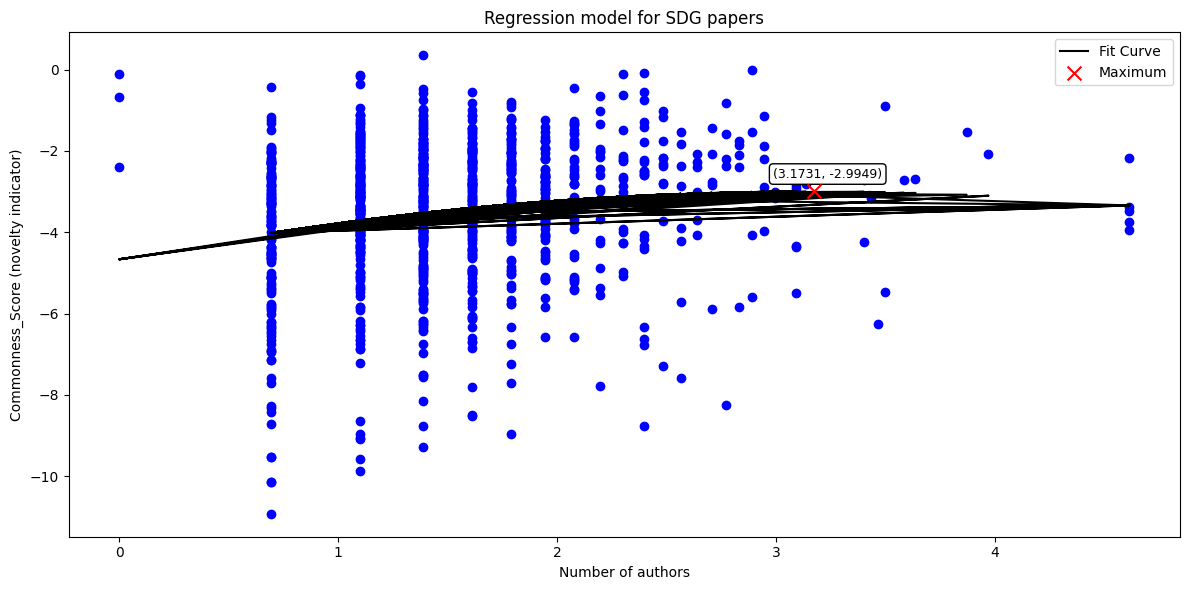

In [109]:
#Ploting to show polynomial relation between Commonness_Score (Nolvty) and number of authors (observations, fit curve and maximum)
plt.figure(figsize=(12, 6))

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Commonness_Score'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='black', label='Fit Curve')
plt.scatter(log_num_authors_SDG_max, commonness_score_max, color='red', s=100, marker='x', zorder=5, label='Maximum')

plt.annotate(f'({log_num_authors_SDG_max:.4f}, {commonness_score_max:.4f})', 
             (log_num_authors_SDG_max, commonness_score_max), 
             textcoords="offset points", 
             xytext=(10,10),  
             ha='center', 
             fontsize=9, 
             color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.xlabel("Number of authors")
plt.ylabel('Commonness_Score (novelty indicator)')
plt.title('Regression model for SDG papers')
plt.legend()

plt.tight_layout()
plt.show()